In [1]:
import pandas as pd
import numpy as np
from IPython.display import display
import math
import yaml
import matplotlib.pyplot as plt
import matplotlib as mpl

%matplotlib inline

In [2]:
#dataFilePathNN = "../data/testLibrary/results1/Cijk_Ailk_Bljk_SB/0/data/benchmark.csv"
#dataNN = pd.read_csv(dataFilePathNN).rename(str.strip,axis='columns')

dataFilePathNT = "../data/testLibrary/results1/Cijk_Ailk_Bjlk_SB/1/data/benchmark.csv"
dataNT = pd.read_csv(dataFilePathNT).rename(str.strip,axis='columns')

#dataFilePathTN = "../data/testLibrary/results1/Cijk_Alik_Bljk_SB/2/data/benchmark.csv"
#dataTN = pd.read_csv(dataFilePathTN).rename(str.strip,axis='columns')

In [3]:
sizesNT = dataNT[['SizeI','SizeJ','SizeK','SizeL']]
keysNT = sizesNT.apply(lambda row: (row.SizeI,row.SizeJ,row.SizeK,row.SizeL), axis=1)
dataNT.index = list(keysNT) 
dataNT_T = dataNT.iloc[:,10:].T

In [4]:
maxNT = dataNT_T.max()
idxmaxNT = maxNT.idxmax()

In [5]:
idxmaxNT

(319, 300, 1, 256)

In [6]:
myidxsNT = [(n,300,1,256) for n in range(192,320)]
keyMaxNT = dataNT_T[myidxsNT][idxmaxNT].idxmax()

In [7]:
keyMaxNT

'Cijk_Ailk_Bjlk_SB_MT256x32x8_SE_EPS1_GRVW4_K1_NLCA1_PGR1_WG32_4_2_WGM8'

In [8]:
rowMaxNT = dataNT.loc[myidxsNT][keyMaxNT]
keys_nt_tmp = [n[0] for n in list(rowMaxNT.keys())]
keys_nt_tmp
rowMaxNT.index = keys_nt_tmp

In [9]:
rowMaxNT

192    365
193    359
194    362
195    371
196    370
      ... 
315    618
316    616
317    619
318    616
319    622
Name: Cijk_Ailk_Bjlk_SB_MT256x32x8_SE_EPS1_GRVW4_K1_NLCA1_PGR1_WG32_4_2_WGM8, Length: 128, dtype: int64

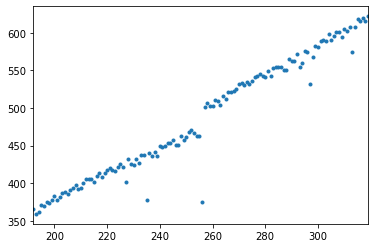

In [10]:
#outputFile = outputFilePath + "/plot_nt.png"
rowMaxNT.plot(style='.')
#rowMaxNT.plot(style='.')

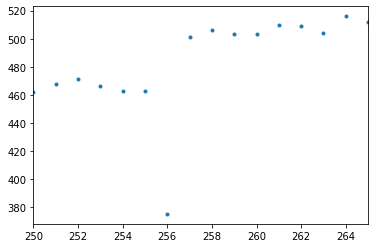

In [11]:
rowMaxNT.loc[250:265].plot(style='.')

In [12]:
rowMaxNT_slice_no_outlier = rowMaxNT.loc[240:280].drop([256])

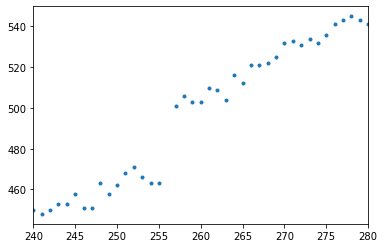

In [13]:
#outputFile = outputFilePath + "/plot_nt_240-280_min.png"
#rowMaxNT_slice_no_outlier.plot(style='.').get_figure().savefig(outputFile)
rowMaxNT_slice_no_outlier.plot(style='.')

In [14]:
import statsmodels.api as sm
import statsmodels.formula.api as smf

In [15]:
X = pd.Series(list(rowMaxNT.index))
y = pd.Series(rowMaxNT.values)
X = sm.add_constant(X)

/opt/conda/lib/python3.7/site-packages/numpy/core/fromnumeric.py:2495: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


In [16]:
linear_regression = sm.OLS(y,X)
fitted_model = linear_regression.fit()
fitted_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.963
Model:                            OLS   Adj. R-squared:                  0.962
Method:                 Least Squares   F-statistic:                     3252.
Date:                Thu, 16 Apr 2020   Prob (F-statistic):           7.52e-92
Time:                        22:36:11   Log-Likelihood:                -529.50
No. Observations:                 128   AIC:                             1063.
Df Residuals:                     126   BIC:                             1069.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        -45.5896      9.428     -4.836      0.000     -64.247     -26.932
0              2.0826      0.037     57.027      0.000       2.010       2.155
==============================================================================
Omnibus:                      147.378   Durbin-Watson:                   1.408
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             3606.282
Skew:                          -4.150   Prob(JB):                         0.00
Kurtosis:                      27.643   Cond. No.                     1.80e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.8e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [17]:
print (fitted_model.params)

const   -45.589613
0         2.082634
dtype: float64


In [18]:
fitted_values = fitted_model.predict(X)

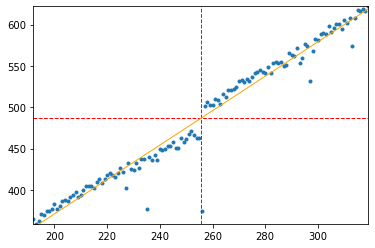

In [19]:
x_range = [X[0].min(),X[0].max()]
y_range = [y.min(),y.max()]
scatter_plot = rowMaxNT.plot(style='.', xlim=x_range, ylim=y_range)
meanY = scatter_plot.plot(x_range, [rowMaxNT.mean(),rowMaxNT.mean()], '--', color='red', linewidth=1)
meanX = scatter_plot.plot([X[0].mean(),X[0].mean()], y_range, '--', color='red', linewidth=1)
regression_line = scatter_plot.plot(X[0], fitted_values, '-', color='orange', linewidth=1)

In [20]:
rowUpper = rowMaxNT.loc[257:]
rowLower = rowMaxNT.loc[:255]

In [21]:
rowLower

192    365
193    359
194    362
195    371
196    370
      ... 
251    468
252    471
253    466
254    463
255    463
Name: Cijk_Ailk_Bjlk_SB_MT256x32x8_SE_EPS1_GRVW4_K1_NLCA1_PGR1_WG32_4_2_WGM8, Length: 64, dtype: int64

In [22]:
Xu = pd.Series(list(rowUpper.index))
yu = pd.Series(rowUpper.values)
Xu = sm.add_constant(Xu)

Xl = pd.Series(list(rowLower.index))
yl = pd.Series(rowLower.values)
Xl = sm.add_constant(Xl)

In [23]:
linear_regression_upper = sm.OLS(yu,Xu)
fitted_model_upper = linear_regression_upper.fit()
#fitted_model_upper.summary()

linear_regression_lower = sm.OLS(yl,Xl)
fitted_model_lower = linear_regression_lower.fit()
#fitted_model_lower.summary()

In [24]:
print (fitted_model.params)
print (fitted_model_lower.params)
print (fitted_model_upper.params)

const   -45.589613
0         2.082634
dtype: float64
const    55.238255
0         1.619460
dtype: float64
const    22.490527
0         1.861943
dtype: float64


In [25]:
fitted_values_lower = fitted_model_lower.predict(X)
fitted_values_upper = fitted_model_upper.predict(X)

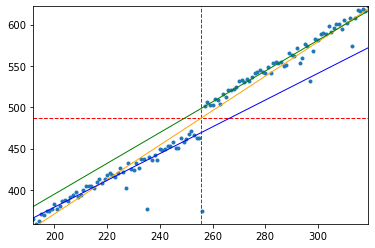

In [26]:
x_range = [X[0].min(),X[0].max()]
y_range = [y.min(),y.max()]
scatter_plot = rowMaxNT.plot(style='.', xlim=x_range, ylim=y_range)
meanY = scatter_plot.plot(x_range, [rowMaxNT.mean(),rowMaxNT.mean()], '--', color='red', linewidth=1)
meanX = scatter_plot.plot([X[0].mean(),X[0].mean()], y_range, '--', color='red', linewidth=1)
regression_line = scatter_plot.plot(X[0], fitted_values, '-', color='orange', linewidth=1)
regression_line_upper = scatter_plot.plot(X[0], fitted_values_upper, '-', color='green', linewidth=1)
regression_line_lower = scatter_plot.plot(X[0], fitted_values_lower, '-', color='blue', linewidth=1)